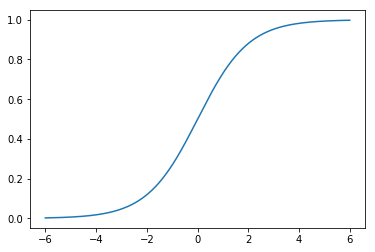

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

class SigmoidTest(object):
    pass
    
    def __init__(self):
        pass
    
    def sigmoid (self, z):
        return 1/(1+np.exp(-z))
    
    def testSigmoid(self):
        x = np.arange(-6,6,0.01)
        y = self.sigmoid(x)
        plt.plot(x,y)
        plt.show()
        

SigmoidTest().testSigmoid()

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#example without train, it will not work.
class NeuralNetwork(object):
    pass
    
    def __init__(self):
        self.inputLayerSize=2
        self.hiddenLayerSize=3
        self.outputLayerSize=1
        
        self.W1 = np.random.randn(self.inputLayerSize, self.hiddenLayerSize);
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize, );
        
        
        
    def sigmoid (self, z):
        return 1/(1+np.exp(-z))
    
   
    
    def testSigmoid(self):
        x = np.arange(-6,6,0.01)
        y = self.sigmoid(x)
        plt.plot(x,y)
        plt.show()
        
    def forward(self, X):
        
        self.z2 = np.dot(X,self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2,self.W2)
        self.yHat = self.sigmoid(self.z3)
        return self.yHat
    
    
        
    
X = np.array([[3,5],[5,1],[10,2]])
y = np.array([75,82,93])/100
yHat = NeuralNetwork().forward(X)
print(yHat,y)

[[ 0.29468894]
 [ 0.30808617]
 [ 0.3233584 ]] [ 0.75  0.82  0.93]


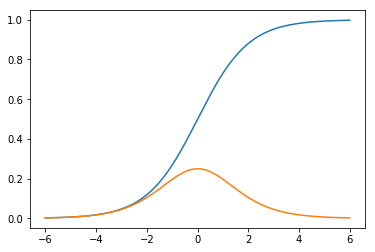

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#test derivative of sigmoid
class NeuralNetwork(object):
    pass
    
    def __init__(self):
        self.inputLayerSize=2
        self.hiddenLayerSize=3
        self.outputLayerSize=1
        
        self.W1 = np.random.randn(self.inputLayerSize, self.hiddenLayerSize);
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize, );
        
        
        
    def sigmoid (self, z):
        return 1/(1+np.exp(-z))
    
    def derivativeOfSigmoid(self,z):
        #z= 1/(1+e^(-z))
        #derivative(z)
        # 1->u z->v
        # derivative(z) = (u'v-v'u)/v^2
        # derivative(z) = e^(-z)/(1+e^(-z))^2
        
        return np.exp(-z)/( (1+np.exp(-z))**2 )
    
    def testDeivativeOfSigmoid(self):
        x = np.arange(-6,6,0.01)
        y = self.sigmoid(x)
        yprime = self.derivativeOfSigmoid(x)
        plt.plot(x,y)
        plt.plot(x,yprime)
        
        plt.show()
    
    def testSigmoid(self):
        x = np.arange(-6,6,0.01)
        y = self.sigmoid(x)
        plt.plot(x,y)
        plt.show()
        
    def forward(self, X):
        
        self.z2 = np.dot(X,self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2,self.W2)
        self.yHat = self.sigmoid(self.z3)
        return self.yHat
    
    
        
    
yHat = NeuralNetwork().testDeivativeOfSigmoid()


<img src="../../../Screenshots/neural-network-calc.png" width="400px" />


In [65]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

class NeuralNetwork(object):
    pass
    
    def __init__(self, X,y):
        self.X = X;
        self.y = y;
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        self.W1 = np.random.randn(self.inputLayerSize, self.hiddenLayerSize);
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize, );
        
        
        
    def sigmoid (self, z):
        return 1/(1+np.exp(-z))
    
    def derivativeOfSigmoid(self,z):
        #z= 1/(1+e^(-z))
        #derivative(z)
        # 1->u z->v
        # derivative(z) = (u'v-v'u)/v^2
        # derivative(z) = e^(-z)/(1+e^(-z))^2
        
        return np.exp(-z)/(1+np.exp(-z))**2
    
    def testDeivativeOfSigmoid(self):
        self.x = np.arange(-6,6,0.01)
        self.y = self.sigmoid(self.x)
        self.yprime = self.derivativeOfSigmoid(x)
        plt.plot(self.x,self.y)
        plt.plot(self.x,self.yprime)
        
        plt.show()
    
    def testSigmoid(self):
        self.x = np.arange(-6,6,0.01)
        self.y = self.sigmoid(self.x)
        plt.plot(self.x,self.y)
        plt.show()
        
    def forward(self):
        
        self.z2 = np.dot(self.X,self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2,self.W2)
        self.yhat = self.sigmoid(self.z3)
        return self.yhat
    
    def costFunction(self):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward()
        J = 0.5*sum((self.y-self.yHat)**2)
        return J
    
    def costFunctionPrime(self):
        self.yhat = self.forward()
        
        
        residual = self.y- self.yhat.ravel()
        delta3 = np.multiply(-residual, self.derivativeOfSigmoid(self.z3).ravel())
        dJW2 = np.dot(self.a2.T, delta3)
        
        print(np.shape(self.derivativeOfSigmoid(self.z2)))
        delta2 = np.dot(delta3, self.W2)*self.derivativeOfSigmoid(self.z2)
        dJW1 = np.dot(X.T, delta2)  
        return dJW1, dJW2
    
    def gradients(self):
        dJW1, dJW2 = self.costFunctionPrime()
        return np.concatenate( ( np.array(dJW1.ravel()), np.array(dJW2.ravel()) ) )

    
    #Helper Functions for interacting with other classes:
    def getParams(self):
        #Get W1 and W2 unrolled into vector:
        params = np.concatenate( ( np.array(self.W1.ravel()), np.array(self.W2.ravel()) ) )
        return params
    
    def setParams(self, params):
        #Set W1 and W2 using single paramater vector.
        W1_start = 0
        W1_end = self.hiddenLayerSize * self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], (self.inputLayerSize , self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], (self.hiddenLayerSize, self.outputLayerSize))

    def computeNumericalGradient(N):
        paramsInitial = N.getParams()
        numgrad = np.zeros(paramsInitial.shape)
        perturb = np.zeros(paramsInitial.shape)
        e = 1e-4

        for p in range(len(paramsInitial)):
            #Set perturbation vector
            perturb[p] = e
            N.setParams(paramsInitial + perturb)
            loss2 = N.costFunction(self.X, self.y)
            
            N.setParams(paramsInitial - perturb)
            loss1 = N.costFunction(self.X, self.y)

            #Compute Numerical Gradient
            numgrad[p] = (loss2 - loss1) / (2*e)

            #Return the value we changed to zero:
            perturb[p] = 0
            
        #Return Params to original value:
        N.setParams(paramsInitial)

        return numgrad
        
X = np.array([[3,5],[5,1],[10,2]])
y = np.array([75,82,93])/100
nn = NeuralNetwork(X,y)
costs = nn.costFunctionPrime()


print (costs)

dJW2: [-0.05497568 -0.07165967  0.03028665] [ 0.00863062  0.00692252 -0.00273274] [ 0.00835125  0.00363626  0.011604  ]
(3, 3)
(array([[ 0.01028147,  0.0405859 ,  0.01601844],
       [ 0.01589564,  0.01496579,  0.00351008]]), array([ 0.00835125,  0.00363626,  0.011604  ]))


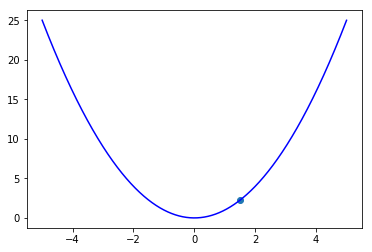

analytic_derivative: 3.0
numeric_derivative: 2.9999999999996696


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return x**2

def fprime(x):
    return 2*x

x=np.arange(-5,5,0.001)
plt.plot(x,f(x),'b')
plt.scatter(1.5,f(1.5))
plt.show()

epsilon = 10**(-3)
numeric_derivative = (f(1.5+epsilon) - f(1.5-epsilon))/(2*epsilon)
analytic_derivative = fprime(1.5)
print("analytic_derivative:",analytic_derivative)
print("numeric_derivative:",numeric_derivative)


In [66]:
#neural network trainer class

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize


class NeuralNetworkTrainer(object):
    pass

    def __init__(self, N):
        self.N = N
        
        
    def costFunctionWrapper(self, params, X,y):
        self.N.setParams(params)
        cost = self.N.costFunction()
        gradients = self.N.gradients()
        print ("cost, gradients, shapes:",np.shape(cost),np.shape(gradients))
        return cost, gradients
        
    def callbackF(self,params):
        self.N.setParams(params)
        self.J.append(self.N.costFunction())
        
    def train(self, X,y):
        self.X = X
        self.y = y
        self.J = []
        
        params0 = self.N.getParams()
        print("params0:",np.shape(params0))
        options={'maxiter':200,'disp':True}
        
        res_ = optimize.minimize(
            self.costFunctionWrapper, 
            params0, 
            jac=True, 
            method='BFGS', 
            args=(X,y), 
            options=options,
            callback=self.callbackF)
        
        self.N.setParams(res_.x)
        self.optimizationREsults = res_
        
        

X = np.array([[3,5],[5,1],[10,2]])
y = np.array([75,82,93])/100

NN = NeuralNetwork(X,y)
nnTrainer = NeuralNetworkTrainer(NN)
nnTrainer.train(X,y)
            

params0: (9,)
dJW2: [ 0.60533685  0.67385172  0.80083986] [-0.07490179 -0.08408926 -0.09007671] [-0.23927273 -0.23745543 -0.08111854]
(3, 3)
cost, gradients, shapes: (3,) (9,)
dJW2: [ 0.60533685  0.67385172  0.80083986] [-0.07490179 -0.08408926 -0.09007671] [-0.23927273 -0.23745543 -0.08111854]
(3, 3)
cost, gradients, shapes: (3,) (9,)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()